In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [34]:
# Load the data
file_path = '/Users/jordannelson/Documents/OneDrive - UWE Bristol Merla Pumffrey/Masters Project/Data/Renewable Energy & Carbon Emmissions.xlsx'
df = pd.read_excel(file_path)

In [36]:
print(df.head())

   Year  Primary Energy: Consumption  Carbon Dioxide Emissions from Energy  \
0  1965                     8.338409                            688.098035   
1  1966                     8.379000                            680.946946   
2  1967                     8.381571                            670.097427   
3  1968                     8.681128                            689.743000   
4  1969                     8.995429                            707.625731   

   Renewable power generation (TWh)  
0                             4.612  
1                             4.536  
2                             4.885  
3                             3.722  
4                             3.256  


In [38]:
# Check for missing values
print(df.isnull().sum())

Year                                    0
Primary Energy: Consumption             0
Carbon Dioxide Emissions from Energy    0
Renewable power generation (TWh)        0
dtype: int64


In [40]:
# Summary statistics
print(df.describe())

              Year  Primary Energy: Consumption  \
count    59.000000                    59.000000   
mean   1994.000000                     8.793240   
std      17.175564                     0.678264   
min    1965.000000                     6.950134   
25%    1979.500000                     8.358704   
50%    1994.000000                     8.938615   
75%    2008.500000                     9.244695   
max    2023.000000                     9.765657   

       Carbon Dioxide Emissions from Energy  Renewable power generation (TWh)  
count                             59.000000                         59.000000  
mean                             563.230424                         26.653154  
std                              100.833797                         39.800658  
min                              320.882059                          3.256000  
25%                              533.205845                          4.536000  
50%                              574.631276                 

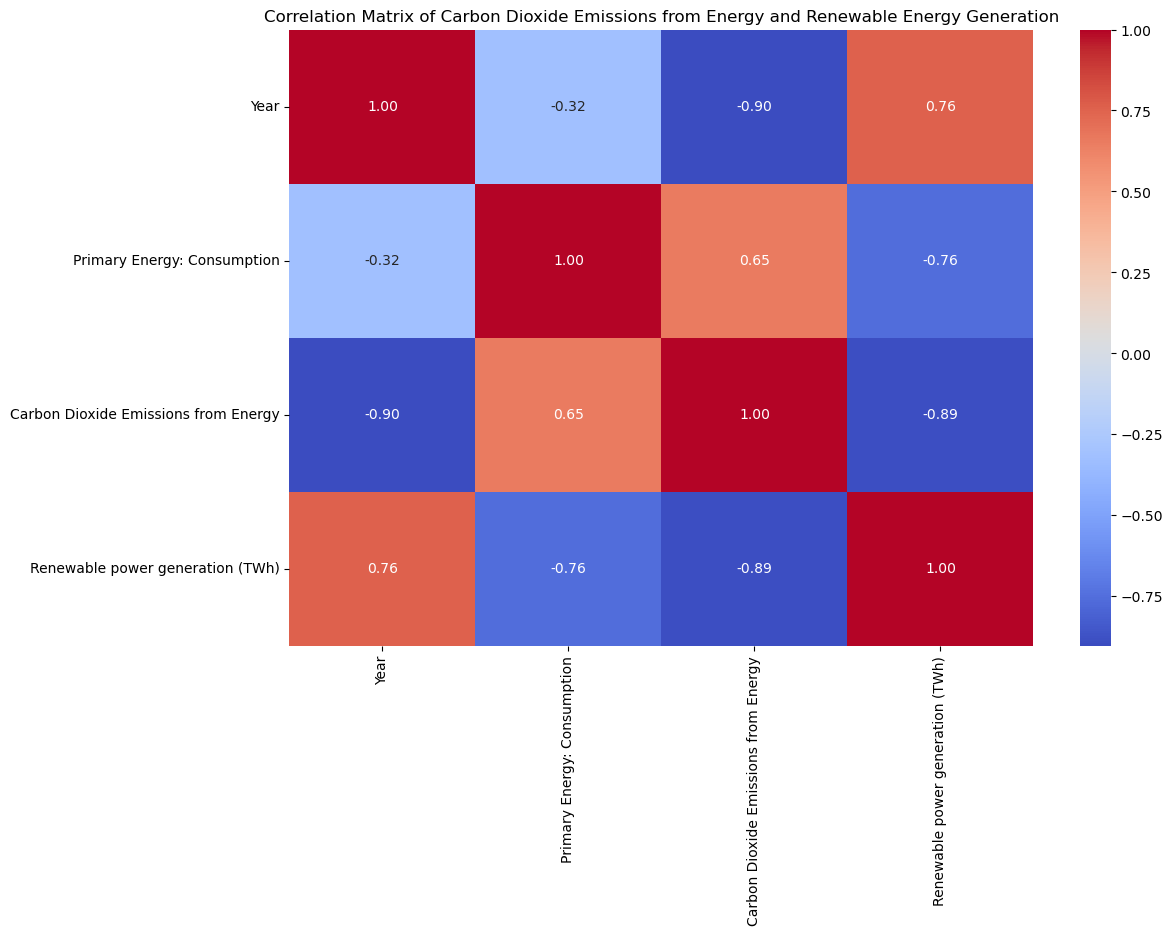

In [42]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Carbon Dioxide Emissions from Energy and Renewable Energy Generation')
plt.show()

In [44]:
# Define the independent variables (weather data) and dependent variable (Solar PV output)
X = df[['Renewable power generation (TWh)']]
y = df['Carbon Dioxide Emissions from Energy']

# Add a constant to the independent variables matrix
X = sm.add_constant(X)

In [46]:
# Perform the regression
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

                                     OLS Regression Results                                     
Dep. Variable:     Carbon Dioxide Emissions from Energy   R-squared:                       0.797
Model:                                              OLS   Adj. R-squared:                  0.794
Method:                                   Least Squares   F-statistic:                     224.5
Date:                                  Sat, 31 Aug 2024   Prob (F-statistic):           2.01e-21
Time:                                          08:05:35   Log-Likelihood:                -308.30
No. Observations:                                    59   AIC:                             620.6
Df Residuals:                                        57   BIC:                             624.8
Df Model:                                             1                                         
Covariance Type:                              nonrobust                                         
                              

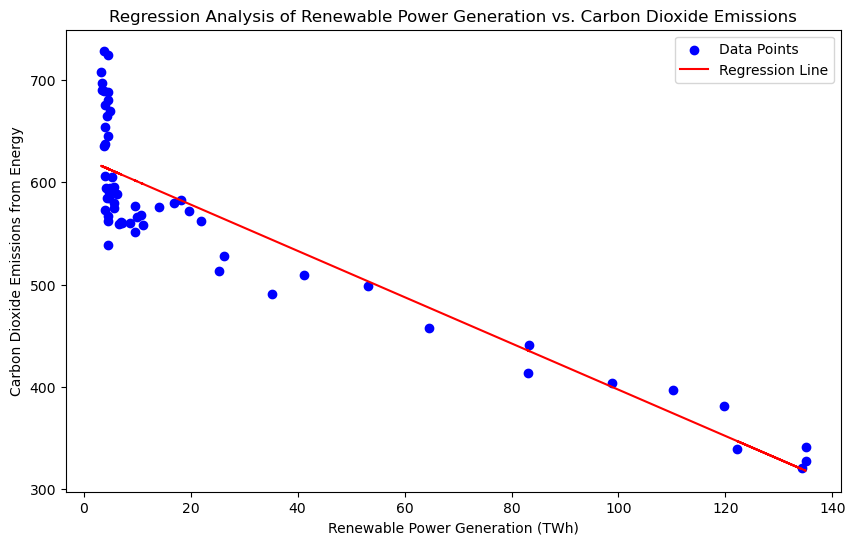

In [48]:
# Plotting the regression line
plt.figure(figsize=(10, 6))
plt.scatter(df['Renewable power generation (TWh)'], df['Carbon Dioxide Emissions from Energy'], color='blue', label='Data Points')
plt.plot(df['Renewable power generation (TWh)'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Renewable Power Generation (TWh)')
plt.ylabel('Carbon Dioxide Emissions from Energy')
plt.title('Regression Analysis of Renewable Power Generation vs. Carbon Dioxide Emissions')
plt.legend()
plt.show()

In [50]:
# Actual values
y_true = df['Carbon Dioxide Emissions from Energy']

# Predicted values
y_pred = model.predict(X)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# R-squared (R2)
r2 = r2_score(y_true, y_pred)
print(f"R-squared (R2): {r2:.2f}")

# Adjusted R-squared
n = len(y_true)  
p = X.shape[1] - 1  
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
print(f"Adjusted R-squared: {adjusted_r2:.2f}")

Mean Squared Error (MSE): 2024.24
Root Mean Squared Error (RMSE): 44.99
Mean Absolute Error (MAE): 36.34
R-squared (R2): 0.80
Adjusted R-squared: 0.79
